In [1]:
# install sklearn and pandas
!pip install --user --upgrade pip
!pip install --user sklearn
!pip install --user pandas 
import pickle, sklearn
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Load Dataset

In [2]:
with open("marketing", "rb") as f:
    dataset=pickle.load(f)
Marketing=dataset["Dataset"]


In [3]:
Marketing_X=Marketing[["Income","Year_Birth","Response"]]
Marketing_y=Marketing["Kidhome"]


# Cross-validation

## Train-validation-test

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [4]:
from sklearn.model_selection import train_test_split

### split whole data to train and test 
train_x,test_x, train_y, test_y=train_test_split(Marketing_X,Marketing_y,test_size=0.15,random_state=10)

### split training set to train and validation  
train_x,validation_x, train_y, validation_y=train_test_split(train_x,train_y,test_size=0.20,random_state=20)

In [5]:
## train 10 models with 10 different max_depth = 1, 2, 3, ..., 10

Accuracy=np.empty(10)
Depth_candidates=range(1,11)
for depth in Depth_candidates:
    ## use train set to train each model
    model=DecisionTreeClassifier(max_depth=depth,criterion="entropy")
    model.fit(train_x,train_y)
    ## use validation set to report the accuracy
    Accuracy[depth-1]=np.mean(validation_y==model.predict(validation_x))

Accuracy


array([0.76923077, 0.76127321, 0.76127321, 0.78514589, 0.78514589,
       0.77188329, 0.74801061, 0.74535809, 0.75596817, 0.74005305])

In [6]:
##determine the model (best max_depth in this case)
Depth_best=Depth_candidates[np.argmax(Accuracy)]
Depth_best

4

In [7]:
## retrain the best model using both training and validation 
train_valid_x=pd.concat([train_x,validation_x])
train_valid_y=pd.concat([train_y,validation_y])
model=DecisionTreeClassifier(max_depth=Depth_best,criterion="entropy")
model.fit(train_valid_x,train_valid_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
## report the accuracy using test set 

np.mean(test_y==model.predict(test_x))

0.7807807807807807

## k-fold cross validation 

[sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [9]:
from sklearn.model_selection import KFold
## split the whole data to train/test 
train_x,test_x, train_y, test_y=train_test_split(Marketing_X,Marketing_y,test_size=0.15,random_state=30)

## perform k fold split on training set 
kf = KFold(n_splits=5)
kf.get_n_splits(train_x)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [10]:
## check out how split is done 
for train_index,test_index  in kf.split(train_x):
    print (test_index,train_index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [11]:
## Perform k-fold cross-validation on the training set 
Accuracy=np.empty((5,10))
i=0
for train_index,valid_index  in kf.split(train_x):
    for depth in Depth_candidates:
        ## use train set to train each model
        model=DecisionTreeClassifier(max_depth=depth,criterion="entropy")
        model.fit(train_x.values[train_index],train_y.values[train_index])
        ## use validation set to report the accuracy
        Accuracy[i,depth-1]=np.mean(train_y.values[valid_index]==model.predict(train_x.values[valid_index]))
    i=i+1
Accuracy


array([[0.73740053, 0.77984085, 0.76923077, 0.76923077, 0.76923077,
        0.76657825, 0.77453581, 0.77984085, 0.77718833, 0.77984085],
       [0.75596817, 0.76923077, 0.77188329, 0.75596817, 0.75596817,
        0.75066313, 0.76657825, 0.78779841, 0.77984085, 0.77984085],
       [0.77453581, 0.78514589, 0.79045093, 0.78514589, 0.76392573,
        0.77453581, 0.75862069, 0.78779841, 0.77188329, 0.77188329],
       [0.7606383 , 0.77925532, 0.77393617, 0.7712766 , 0.77925532,
        0.76861702, 0.76595745, 0.75797872, 0.76329787, 0.75      ],
       [0.74734043, 0.74202128, 0.75531915, 0.75531915, 0.75265957,
        0.73670213, 0.73138298, 0.72606383, 0.70478723, 0.71542553]])

In [12]:
## average out the accuracy 
Accuracy=np.mean(Accuracy,axis=0)
Accuracy

array([0.75517665, 0.77109882, 0.77216406, 0.76738811, 0.76420791,
       0.75941927, 0.75941503, 0.76789604, 0.75939951, 0.7593981 ])

In [13]:
## alternatively, we can do grit search
from sklearn.model_selection import GridSearchCV

model=GridSearchCV(DecisionTreeClassifier(criterion="entropy"),param_grid={"max_depth":range(1,11)}
             ,cv=kf , n_jobs=-1)
model.fit(train_x,train_y)
model.cv_results_["mean_test_score"], model.best_estimator_, model.best_score_

(array([0.75517665, 0.77109882, 0.77216406, 0.76738811, 0.76420791,
        0.76207602, 0.76207038, 0.76736131, 0.75993284, 0.75833568]),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 0.7721640611772673)

In [14]:
## retrain the best model using both training and validation 
 
model=model.best_estimator_
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
## report the accuracy using test set 

np.mean(test_y==model.predict(test_x))

0.7687687687687688

# Leave on out 

In [16]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(train_x)

model=GridSearchCV(DecisionTreeClassifier(criterion="entropy"),param_grid={"max_depth":range(1,11)}
             ,cv=loo , n_jobs=-1)
model.fit(train_x,train_y)
model.cv_results_["mean_test_score"], model.best_estimator_, model.best_score_


(array([0.76898566, 0.7748274 , 0.77695167, 0.7503983 , 0.76048858,
        0.76579926, 0.75358471, 0.73765268, 0.74668083, 0.76208178]),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 0.7769516728624535)

In [17]:
## retrain the best model using both training and validation 
 
model=model.best_estimator_
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
## report the accuracy using test set 

np.mean(test_y==model.predict(test_x))

0.7687687687687688

# Regression Tree

In [19]:
List1=list(Marketing.dtypes[Marketing.dtypes==int].index)
List1.remove("ID")
List1

['Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

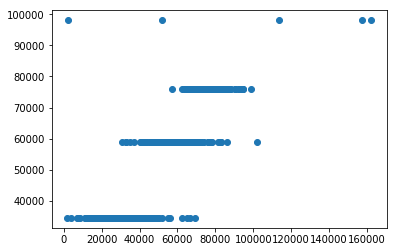

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
Marketing_y=Marketing["Income"]
Marketing_x=Marketing[List1]
train_x,test_x, train_y, test_y=train_test_split(Marketing_x,Marketing_y,test_size=0.15,random_state=10)
 

model=DecisionTreeRegressor( max_depth=2)
model.fit(train_x,train_y)
predictions=model.predict(test_x)
plt.scatter(test_y,predictions)


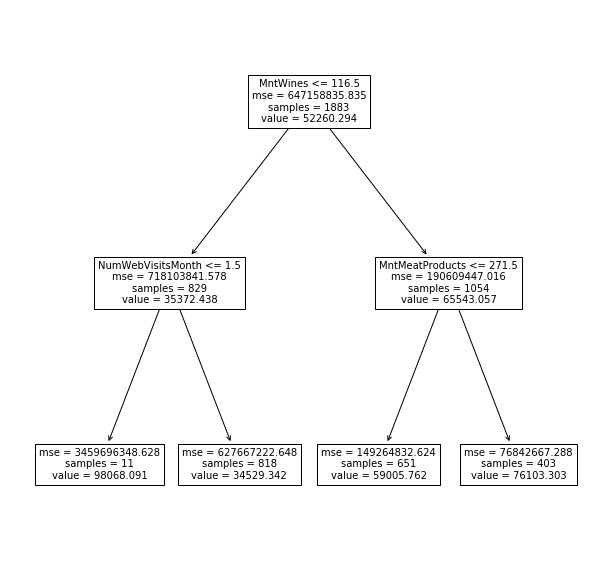

In [21]:
plt.figure(figsize=(10,10))
plot_tree(model,max_depth=2,fontsize=10,feature_names=List1)
plt.show()

## Get decision path 

In [22]:
Obs=Marketing_x.iloc[[0],:]
Obs

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,0,0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,3,11,1


In [23]:
dir(model)
model.predict(Obs)

array([76103.30272953])

In [24]:
path=model.decision_path(Obs)
print(path)

  (0, 0)	1
  (0, 4)	1
  (0, 6)	1


In [25]:
## which are the features used on each step?
np.array(List1)[path.indices]

array(['Year_Birth', 'MntWines', 'MntMeatProducts'], dtype='<U19')

In [26]:
## what are the threshold for each step?
np.array(model.tree_.threshold)[path.indices]

array([116.5, 271.5,  -2. ])

In [27]:
## did we go to left child (True) or right child (False)?
observed=Obs.iloc[:,path.indices]
used=np.array(model.tree_.threshold)[path.indices]
np.array(observed)<used

array([[False, False, False]])

In [28]:
## prediction
model.tree_.value[6]

array([[76103.30272953]])